# Symbolic calculations in Julia

`Symbolics.jl` is a computer Algebra System (CAS) for Julia. The symbols are number-like and follow Julia semantics so we can put them into a regular function to get a symbolic counterpart. Symbolics.jl is the backbone of ModelingToolkit.jl.

Source:

- [Simulating Big Models in Julia with ModelingToolkit @ JuliaCon 2021 Workshop](https://youtu.be/HEVOgSLBzWA).
- [Symbolics.jl](https://github.com/JuliaSymbolics/Symbolics.jl) Github repo and its [docs](https://symbolics.juliasymbolics.org/dev/).

## Caveats about Symbolics.jl

1. `Symbolics.jl` can only handle *traceble*, *quasi-static* expressions. However, some expressions are not quasi-static e.g. factorial. The number of operations depends on the input value.

> Use `@register` to make it a primitive function.

2. Some code paths is *untraceable*, such as conditional statements: `if`...`else`...`end`.

> You can use `ifelse(cond, ex1, ex2)` to make it traceable.

## Basic operations

- `latexify`
- `derivative`
- `gradient`
- `jacobian`
- `substitute`
- `simplify`

In [1]:
using Symbolics
using Latexify

In [2]:
@variables x y
x^2 + y^2

x^2 + y^2

You can use `Latexify.latexify()` to see the LaTeX code.

In [3]:
A = [
    x^2+y 0 2x
    0 0 2y
    y^2+x 0 0
]

latexify(A)

L"\begin{equation}
\left[
\begin{array}{ccc}
y + x^{2} & 0 & 2 x \\
0 & 0 & 2 y \\
x + y^{2} & 0 & 0 \\
\end{array}
\right]
\end{equation}
"

Derivative: `Symbolics.derivative(expr, variable)`

In [4]:
Symbolics.derivative(x^2 + y^2, x)

2x

Gradient: `Symbolics.gradient(expr, [variables])`

In [5]:
Symbolics.gradient(x^2 + y^2, [x, y])

2-element Vector{Symbolics.Num}:
 2x
 2y

Jacobian: `Symbolics.jacobian([exprs], [variables])`

In [6]:
Symbolics.jacobian([x^2 + y^2; y^2], [x, y])

2×2 Matrix{Symbolics.Num}:
 2x  2y
  0  2y

Substitute: `Symbolics.substitute(expr, mapping)`

In [7]:
Symbolics.substitute(sin(x)^2 + 2 + cos(x)^2, Dict(x => y^2))

2 + sin(y^2)^2 + cos(y^2)^2

In [8]:
Symbolics.substitute(sin(x)^2 + 2 + cos(x)^2, Dict(x => 1.0))

3.0

Simplify: `Symbolics.simplify(expr)`

In [9]:
Symbolics.simplify(sin(x)^2 + 2 + cos(x)^2)

3

This expression gets automatically simplified because it's always true

In [10]:
2x - x

x

In [11]:
ex = x^2 + y^2 + sin(x)
isequal(2ex, ex + ex)

false

In [12]:
isequal(simplify(2ex), simplify(ex + ex))

true

In [13]:
ex / ex

1

Symbolic integration: use [SymbolicNumericIntegration.jl](https://github.com/SciML/SymbolicNumericIntegration.jl). The [Youtube video](https://youtu.be/L47k2zjPU9s) by `doggo dot jl` gives a concise example.

## Custom functions used in Symbolics

With `@register`, the `rand()` in `foo()` will be evaluated as-is and **will not** be expanded by `Symbolics.jl`.

> By default, new functions are traced to the primitives and the symbolic expressions are written on the primitives. However, we can expand the allowed primitives by registering new functions.

## More number types
Complex number

In [14]:
@variables z::Complex

1-element Vector{Complex{Symbolics.Num}}:
 z

Array types with subscript

In [15]:
@variables xs[1:18]

1-element Vector{Symbolics.Arr{Symbolics.Num, 1}}:
 xs[1:18]

In [16]:
xs[1]

xs[1]

Explicit vector form

In [17]:
collect(xs)

18-element Vector{Symbolics.Num}:
  xs[1]
  xs[2]
  xs[3]
  xs[4]
  xs[5]
  xs[6]
  xs[7]
  xs[8]
  xs[9]
 xs[10]
 xs[11]
 xs[12]
 xs[13]
 xs[14]
 xs[15]
 xs[16]
 xs[17]
 xs[18]

Operations on arrays are supported

In [18]:
sum(collect(xs))

xs[1] + xs[10] + xs[11] + xs[12] + xs[13] + xs[14] + xs[15] + xs[16] + xs[17] + xs[18] + xs[2] + xs[3] + xs[4] + xs[5] + xs[6] + xs[7] + xs[8] + xs[9]

## Example: Rosenbrock function

Wikipedia: https://en.wikipedia.org/wiki/Rosenbrock_function
We use the vector form of Rosenbrock function.

In [19]:
rosenbrock(xs) = sum(1:length(xs)-1) do i
    100 * (xs[i+1] - xs[i]^2)^2 + (1 - xs[i])^2
end

rosenbrock (generic function with 1 method)

The function is at minimum when xs are all one's

In [20]:
rosenbrock(ones(100))

0.0

In [21]:
N = 20
@variables xs[1:N]

1-element Vector{Symbolics.Arr{Symbolics.Num, 1}}:
 xs[1:20]

A full list of vector components

In [22]:
xs = collect(xs)

20-element Vector{Symbolics.Num}:
  xs[1]
  xs[2]
  xs[3]
  xs[4]
  xs[5]
  xs[6]
  xs[7]
  xs[8]
  xs[9]
 xs[10]
 xs[11]
 xs[12]
 xs[13]
 xs[14]
 xs[15]
 xs[16]
 xs[17]
 xs[18]
 xs[19]
 xs[20]

In [23]:
rxs = rosenbrock(xs)

(1 - xs[1])^2 + (1 - xs[10])^2 + (1 - xs[11])^2 + (1 - xs[12])^2 + (1 - xs[13])^2 + (1 - xs[14])^2 + (1 - xs[15])^2 + (1 - xs[16])^2 + (1 - xs[17])^2 + (1 - xs[18])^2 + (1 - xs[19])^2 + (1 - xs[2])^2 + (1 - xs[3])^2 + (1 - xs[4])^2 + (1 - xs[5])^2 + (1 - xs[6])^2 + (1 - xs[7])^2 + (1 - xs[8])^2 + (1 - xs[9])^2 + 100((xs[2] - (xs[1]^2))^2) + 100((xs[11] - (xs[10]^2))^2) + 100((xs[12] - (xs[11]^2))^2) + 100((xs[13] - (xs[12]^2))^2) + 100((xs[14] - (xs[13]^2))^2) + 100((xs[15] - (xs[14]^2))^2) + 100((xs[16] - (xs[15]^2))^2) + 100((xs[17] - (xs[16]^2))^2) + 100((xs[18] - (xs[17]^2))^2) + 100((xs[19] - (xs[18]^2))^2) + 100((xs[20] - (xs[19]^2))^2) + 100((xs[3] - (xs[2]^2))^2) + 100((xs[4] - (xs[3]^2))^2) + 100((xs[5] - (xs[4]^2))^2) + 100((xs[6] - (xs[5]^2))^2) + 100((xs[7] - (xs[6]^2))^2) + 100((xs[8] - (xs[7]^2))^2) + 100((xs[9] - (xs[8]^2))^2) + 100((xs[10] - (xs[9]^2))^2)

Gradient

In [24]:
grad = Symbolics.gradient(rxs, xs)

20-element Vector{Symbolics.Num}:
                                -2(1 - xs[1]) - 400xs[1]*(xs[2] - (xs[1]^2))
       -2(1 - xs[2]) + 200(xs[2] - (xs[1]^2)) - 400xs[2]*(xs[3] - (xs[2]^2))
       -2(1 - xs[3]) + 200(xs[3] - (xs[2]^2)) - 400xs[3]*(xs[4] - (xs[3]^2))
       -2(1 - xs[4]) + 200(xs[4] - (xs[3]^2)) - 400xs[4]*(xs[5] - (xs[4]^2))
       -2(1 - xs[5]) + 200(xs[5] - (xs[4]^2)) - 400xs[5]*(xs[6] - (xs[5]^2))
       -2(1 - xs[6]) + 200(xs[6] - (xs[5]^2)) - 400xs[6]*(xs[7] - (xs[6]^2))
       -2(1 - xs[7]) + 200(xs[7] - (xs[6]^2)) - 400xs[7]*(xs[8] - (xs[7]^2))
       -2(1 - xs[8]) + 200(xs[8] - (xs[7]^2)) - 400xs[8]*(xs[9] - (xs[8]^2))
      -2(1 - xs[9]) + 200(xs[9] - (xs[8]^2)) - 400xs[9]*(xs[10] - (xs[9]^2))
  -2(1 - xs[10]) + 200(xs[10] - (xs[9]^2)) - 400xs[10]*(xs[11] - (xs[10]^2))
 -2(1 - xs[11]) + 200(xs[11] - (xs[10]^2)) - 400xs[11]*(xs[12] - (xs[11]^2))
 -2(1 - xs[12]) + 200(xs[12] - (xs[11]^2)) - 400xs[12]*(xs[13] - (xs[12]^2))
 -2(1 - xs[13]) + 200(xs[13] - (xs[12]^2))

Hessian = Jacobian of gradient

In [25]:
hes1 = Symbolics.jacobian(grad, xs)

20×20 Matrix{Symbolics.Num}:
 2 + 800(xs[1]^2) - 400(xs[2] - (xs[1]^2))  …           0
                                 -400xs[1]              0
                                         0              0
                                         0              0
                                         0              0
                                         0  …           0
                                         0              0
                                         0              0
                                         0              0
                                         0              0
                                         0  …           0
                                         0              0
                                         0              0
                                         0              0
                                         0              0
                                         0  …           0
                                         0 

call `hessian()` directly

In [26]:
hes2 = Symbolics.hessian(rxs, xs)

20×20 Matrix{Symbolics.Num}:
 2 + 800(xs[1]^2) - 400(xs[2] - (xs[1]^2))  …           0
                                 -400xs[1]              0
                                         0              0
                                         0              0
                                         0              0
                                         0  …           0
                                         0              0
                                         0              0
                                         0              0
                                         0              0
                                         0  …           0
                                         0              0
                                         0              0
                                         0              0
                                         0              0
                                         0  …           0
                                         0 

In [27]:
isequal(hes1, hes2)

true

### Sparse matrix
Sparse Hessian matrix of the Hessian matrix of the Rosenbrock function w.r.t. to vector components.

In [28]:
hes_sp = Symbolics.hessian_sparsity(rosenbrock, xs)

20×20 SparseArrays.SparseMatrixCSC{Bool, Int64} with 58 stored entries:
⎡⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⎦

Visualize the sparse matrix with `Plots.spy()`

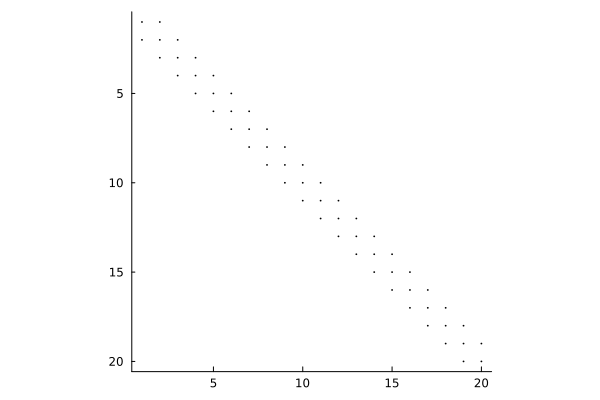

In [29]:
using Plots
spy(hes_sp)

## Generate functions from symbols

- `build_function(ex, args...)` generates out-of-place (oop) and in-place (ip) function expressions in a pair.
- `build_function(ex, args..., parallel=Symbolics.MultithreadedForm())` generates a parallel algorithm to evaluate the output. See the [example](https://symbolics.juliasymbolics.org/stable/tutorials/auto_parallel/) in the official docs.
- `build_function(ex, args..., target=Symbolics.CTarget())` generates a C function from Julia.

In [30]:
fexprs = build_function(grad, xs);

Get the Out-of-place `f(input)` version

In [31]:
foop = eval(fexprs[1])

#3 (generic function with 1 method)

Get the In-place `f!(out, in)` version

In [32]:
fip = eval(fexprs[2])

#5 (generic function with 1 method)

In [33]:
inxs = rand(N)
out = similar(inxs)
fip(out, inxs)  ## The inplace version returns nothing. The results are stored in out parameter.

In [34]:
foop(inxs)
isapprox(foop(inxs), out)

true

You can save the generated function for later use: `write("function.jl", string(fexprs[2]))`
Here, `ForwardDiff.jl` checks if our gradient generated from `Symbolics.jl` is correct.

In [35]:
using ForwardDiff
ForwardDiff.gradient(rosenbrock, inxs) ≈ out

true

Sparse Hessian matrix, only non-zero expressions are calculated.

In [36]:
hexprs = build_function(hes_sp, xs)
hoop = eval(hexprs[1])
hip = eval(hexprs[2])
hoop(rand(N))

20×20 SparseArrays.SparseMatrixCSC{Bool, Int64} with 58 stored entries:
⎡⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⎦

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*